In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [105]:
bha = pd.read_csv('data/bha.csv')
bha

,date,state,count
0,2020-03-26,Andaman and Nicobar Islands,1.0
1,2020-03-27,Andaman and Nicobar Islands,5.0
2,2020-03-28,Andaman and Nicobar Islands,3.0
3,2020-03-29,Andaman and Nicobar Islands,0.0
4,2020-03-30,Andaman and Nicobar Islands,1.0
...,...,...,...
21670,2021-10-27,West Bengal,976.0
21671,2021-10-28,West Bengal,990.0
21672,2021-10-29,West Bengal,982.0
21673,2021-10-30,West Bengal,980.0


In [116]:
df = bha[bha['state'] == 'Jharkhand']
df = df.reset_index(drop = True)

df['rm'] = df['count'].rolling(5).mean()

df

,date,state,count,rm
0,2020-03-31,Jharkhand,1.0,NaN
1,2020-04-01,Jharkhand,0.0,NaN
2,2020-04-02,Jharkhand,1.0,NaN
3,2020-04-03,Jharkhand,0.0,NaN
4,2020-04-04,Jharkhand,0.0,0.4
...,...,...,...,...
575,2021-10-27,Jharkhand,28.0,28.6
576,2021-10-28,Jharkhand,15.0,25.6
577,2021-10-29,Jharkhand,16.0,21.8
578,2021-10-30,Jharkhand,18.0,19.0


In [117]:
mx = df.describe().loc['max']['count']
cutoff = mx * 0.05
mx, cutoff

(8075.0, 403.75)

In [118]:
id_start = 0
id_end = df['count'].idxmax()

for id in range(id_end, 0, -1):
    if df.iloc[id]['count'] < cutoff:
        id_start = id
        break
id_start, id_end, df.iloc[id_start]['count'], df.iloc[id_end]['count']

(363, 393, 155.0, 8075.0)

In [119]:
df = df.iloc[id_start : id_end+1]
df = df.reset_index(drop = True)
df

,date,state,count,rm
0,2021-03-29,Jharkhand,155.0,279.0
1,2021-03-30,Jharkhand,418.0,307.0
2,2021-03-31,Jharkhand,693.0,384.0
3,2021-04-01,Jharkhand,690.0,454.0
4,2021-04-02,Jharkhand,694.0,530.0
5,2021-04-03,Jharkhand,873.0,673.6
6,2021-04-04,Jharkhand,787.0,747.4
7,2021-04-05,Jharkhand,1086.0,826.0
8,2021-04-06,Jharkhand,1264.0,940.8
9,2021-04-07,Jharkhand,1312.0,1064.4


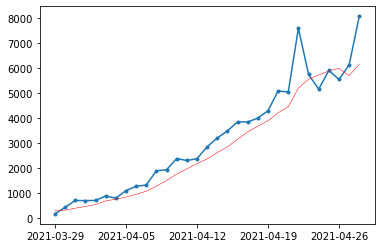

In [120]:
plt.plot(df['date'], df['count'], '.-')
plt.plot(df['date'], df['rm'], 'r', linewidth = 0.5)
plt.xticks(df['date'][::7])
plt.show()